# Sleep data analysis programm
    ## project should allow see the relationship between sleep, health and mood.

In [52]:
# The first data to train the module.
import numpy as np
import pandas as pd
df_octobersleep=pd.DataFrame({
    "day":["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"],
    "hours":["6.26","5.03","6.08","5.40","6.13","6.23","4.41","6.66","8.90","6.65","5.21","6.48","5.48","5.16","nodata","6.35",],
    "conditions":["good","normal","good","good","good","good","normal","good","awesome","good","good","good","normal","normal","nodata","good"]  
})


with pd.ExcelWriter('D:\\Aleksei_Files\\2021_Heavy\\Python\\sleep_data_analitics\\sleepdata.xlsx') as writer:
    df_octobersleep.to_excel(writer, sheet_name="october2022",index = False)
    
workdf=pd.read_excel("D:\\Aleksei_Files\\2021_Heavy\\Python\\sleep_data_analitics\\sleepdata.xlsx","october2022")    
workdf


,day,hours,conditions
0,1,6.26,good
1,2,5.03,normal
2,3,6.08,good
3,4,5.40,good
4,5,6.13,good
5,6,6.23,good
6,7,4.41,normal
7,8,6.66,good
8,9,8.90,awesome
9,10,6.65,good


In [53]:
#replacing "nodata" text to empty cell
workdf=workdf.replace(["nodata"],np.NaN)
#putting average number in NaN sections
workdf=workdf.fillna(method="bfill") 
workdf



,day,hours,conditions
0,1,6.26,good
1,2,5.03,normal
2,3,6.08,good
3,4,5.40,good
4,5,6.13,good
5,6,6.23,good
6,7,4.41,normal
7,8,6.66,good
8,9,8.90,awesome
9,10,6.65,good


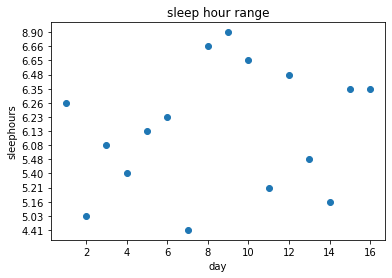

In [56]:
#first graph demonstrations
import matplotlib.pyplot as plt
%matplotlib inline

visualdf=workdf.sort_values(by='hours', ascending=True, na_position='first')

plt.scatter(visualdf.day, visualdf.hours)
plt.title("sleep hour range")
plt.ylabel("sleephours")
plt.xlabel("day")
plt.show()

In [57]:
visualdf

,day,hours,conditions
6,7,4.41,normal
1,2,5.03,normal
13,14,5.16,normal
10,11,5.21,good
3,4,5.40,good
12,13,5.48,normal
2,3,6.08,good
4,5,6.13,good
5,6,6.23,good
0,1,6.26,good
